<a href="https://colab.research.google.com/github/SantiagoFra/Sleep-Analytics/blob/main/sleeping_statistics_english.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA ANALYSIS WITH PYTHON


For this data analysis I wanted to answer some questions that occurred to me when viewing the dataset.


* Is there a correlation between the level of daily physical activity and the quality of sleep?
*How does sleep quality vary between different age groups?
* Do people with healthy eating habits tend to have better quality sleep than those with less healthy habits?
* Do people who take medications have worse sleep quality than those who do not take them?




The first thing I do is add the libraries to use: Pandas, Seaborn and Matplotlib

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

I read my dataset in csv format and store it in the df variable, I proceed to show a bit of the dataset.

In [30]:
df = pd.read_csv('sleep.csv')

In [31]:
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


To find errors in categorical and numerical variables, I show the unique values of each column and see if there is any type of error in them.

In [32]:
for column in df.columns:
  print(f"{column}': {df[column].unique()}")

User ID': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
Age': [25 34 29 41 22 37 30 45 27 32 50 23 36 48 28 31 26 39 33 42 35 40 47 44
 38 49 24 46 43]
Gender': ['f' 'm']
Sleep Quality': [8 7 9 5 6 4]
Bedtime': ['23:00' '00:30' '22:45' '01:00' '23:30' '00:15' '22:30' '01:30' '00:45'
 '22:00' '22:15' '23:45' '01:15' '23:15']
Wake-up Time': ['06:30' '07:00' '06:45' '07:15' '06:00' '07:30' '06:15']
Daily Steps': [ 8000  5000  9000  4000 10000  6000  8500  3000  9500  6500  3500 11000
  7000  5500 10500]
Calories Burned': [2500 2200 2700 2100 2800 2300 2600 2000 2750 2400 2900]
Physical Activity Level': ['medium' 'low' 'high']
Dietary 

Since there are no errors in the columns, I can continue with my analysis. To answer the first question:<br>
Is there a correlation between the level of daily physical activity and the quality of sleep? <br>
I create a dictionary that allows you to associate physical activity with numbers in order to create a new column with them.

In [33]:
activity_mapping = {
    'low': 1,
    'medium': 2,
    'high': 3
}

df['Physical_numeric'] = df['Physical Activity Level'].map(activity_mapping)

I create a scatter plot that allows me to obtain the correlation between physical activity and sleep quality.

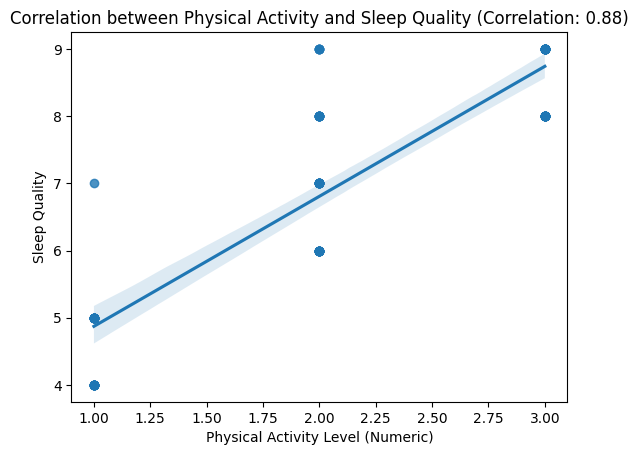

In [34]:
correlation = df['Physical_numeric'].corr(df['Sleep Quality'])

sns.regplot(x='Physical_numeric', y='Sleep Quality', data=df)
plt.title(f'Correlation between Physical Activity and Sleep Quality (Correlation: {correlation:.2f})')
plt.xlabel('Physical Activity Level (Numeric)')
plt.ylabel('Sleep Quality')
plt.show()

I create a function that allows me to group people's ages into different groups to compare the quality of sleep in these groups. I create a new column 'Age_group' with these groups.

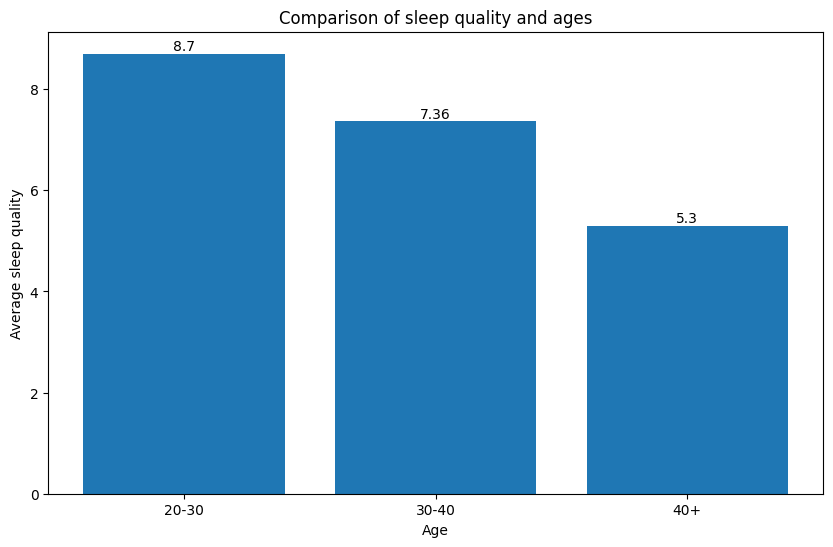

In [35]:
def age_group(age):
  if 20 <= age < 30:
    return '20-30'
  elif 30 <= age < 40:
    return '30-40'
  elif age >= 40:
    return '40+'
  else:
    return 'Otro'

df['Age_Group'] = df['Age'].apply(age_group)

mean = df.groupby('Age_Group')['Sleep Quality'].mean()

plt.figure(figsize=(10, 6))
bars= plt.bar(mean.index, mean.values)
plt.title('Comparison of sleep quality and ages')
plt.xlabel('Age')
plt.ylabel('Average sleep quality')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Here I simply create a pie chart where you can see the proportion of people according to their eating habits.

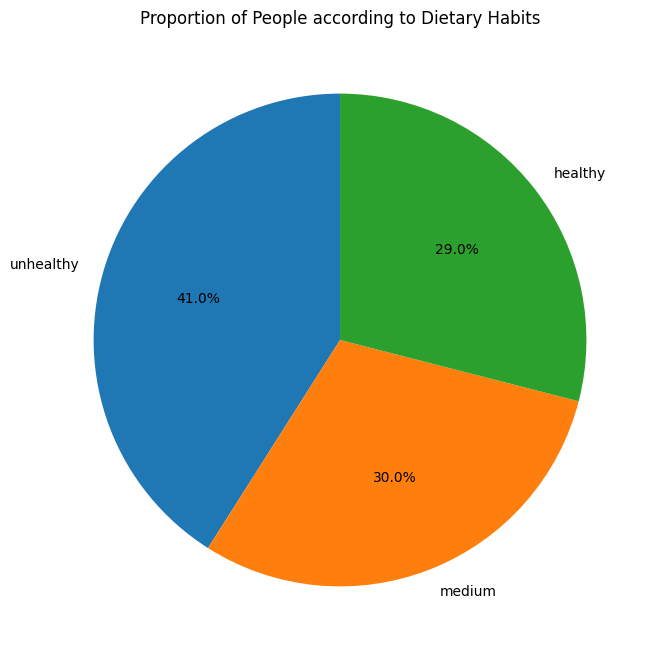

In [36]:
habits = df['Dietary Habits'].value_counts()

#Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(habits, labels=habits.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of People according to Dietary Habits')
plt.show()


I look for the average sleep quality grouped according to eating habits to find if there is any relationship between these two variables.

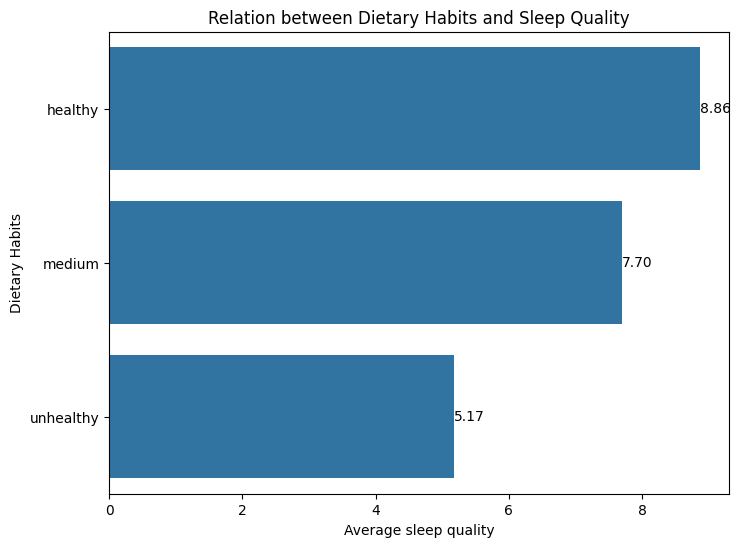

In [37]:
# Average sleep quality by eating habits
sleep_quality_by_habit = df.groupby('Dietary Habits')['Sleep Quality'].mean().sort_values(ascending=False)

#bar chart
plt.figure(figsize=(8,6))
ax = sns.barplot(y='Dietary Habits', x='Sleep Quality', data=df, errorbar =None,
                 order=sleep_quality_by_habit.index)

for index, value in enumerate(sleep_quality_by_habit):
    plt.text(value, index, f'{value:.2f}', va='center')

#labels and titles
plt.ylabel('Dietary Habits')
plt.xlabel('Average sleep quality')
plt.title('Relation between Dietary Habits and Sleep Quality')
plt.show()

Here I create a pie chart that reveals the proportion of people using medications.

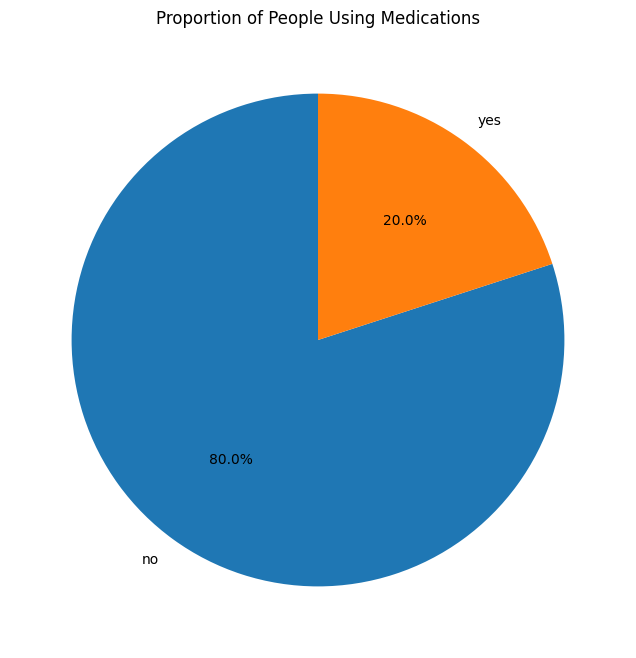

In [38]:
#People who use medications are counted
medication = df['Medication Usage'].value_counts()

#Pie chart
plt.figure(figsize=(8, 8))
plt.pie(medication, labels=medication.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of People Using Medications')
plt.show()


Finally I create a graph to obtain the average sleep quality according to medication use. This is used to see if there is any relationship between the two variables.

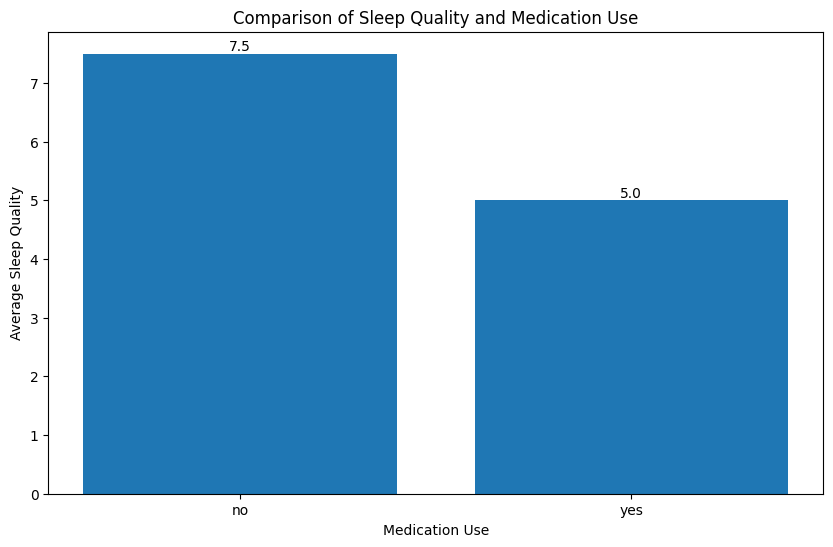

In [39]:
promedio3 = df.groupby('Medication Usage')['Sleep Quality'].mean()

plt.figure(figsize=(10, 6))
bars= plt.bar(promedio3.index, promedio3.values)
plt.title('Comparison of Sleep Quality and Medication Use')
plt.xlabel('Medication Use')
plt.ylabel('Average Sleep Quality')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# CONCLUSIONS


After conducting an exploratory analysis of the data, we can answer the questions asked at the beginning of the analysis.<br>


---


Is there a correlation between the level of daily physical activity and the quality of sleep?<br>
**Answer:** Yes, there is a strong positive correlation (0.88), so we can say that the greater the physical activity a person performs, the greater the quality of sleep.<br><br>


---


How does sleep quality vary between different age groups?<br>
**Answer:** We can see that people between 20-30 years old have a good quality of sleep, with an average of 8.7, followed by those between 30-40 years old, with an average of 7.36, lastly there are people of 40-50 years old with an average sleep quality of 5.3.<br><br>


---


Do people with healthy eating habits tend to have better quality sleep than those with less healthy habits?<br>
**Answer:** Yes, as we saw in the bar graph, people with healthy habits tend to have a better quality of sleep (average of 8.86), while those who have unhealthy habits have a worse quality of sleep (average of 5.17).<br><br>


---


Do people who take medications have worse sleep quality than those who do not take them?<br>
**Answer:** Yes, people who take medications have a worse quality of sleep than those who do not take them. This can be seen in the bar chart.